<>:33: SyntaxWarning: invalid escape sequence '\.'
<>:33: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Vishal Deep\AppData\Local\Temp\ipykernel_12168\3452464638.py:33: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
C:\Users\Vishal Deep\AppData\Local\Temp\ipykernel_12168\3452464638.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


First 5 rows:
                              name survived     sex      age passengerClass
0    Allen, Miss. Elisabeth Walton      yes  female  29.0000            1st
1   Allison, Master. Hudson Trevor      yes    male   0.9167            1st
2     Allison, Miss. Helen Loraine       no  female   2.0000            1st
3  Allison, Mr. Hudson Joshua Crei       no    male  30.0000            1st
4  Allison, Mrs. Hudson J C (Bessi       no  female  25.0000            1st

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1046 non-null   object 
 1   survived  1046 non-null   object 
 2   Sex       1046 non-null   object 
 3   Age       1046 non-null   float64
 4   Pclass    1046 non-null   int64  
 5   Survived  1046 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 49.2+ KB
None

Missing values per column:
N

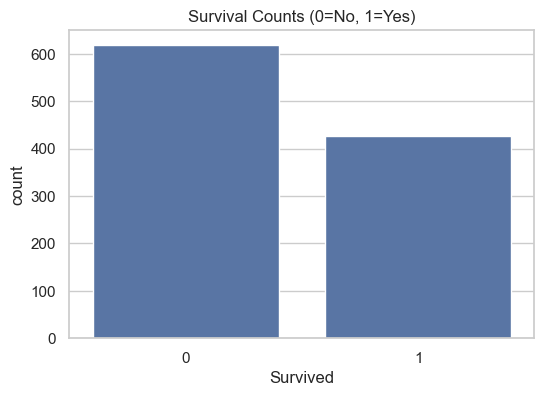

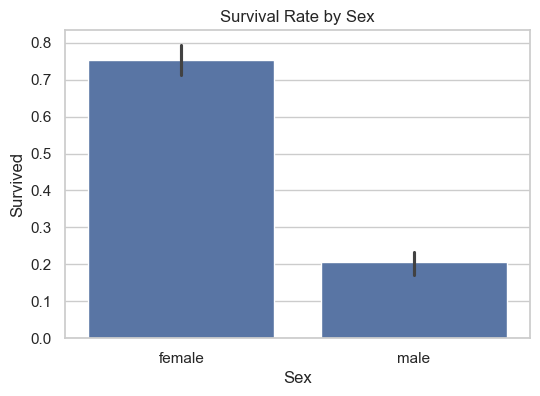

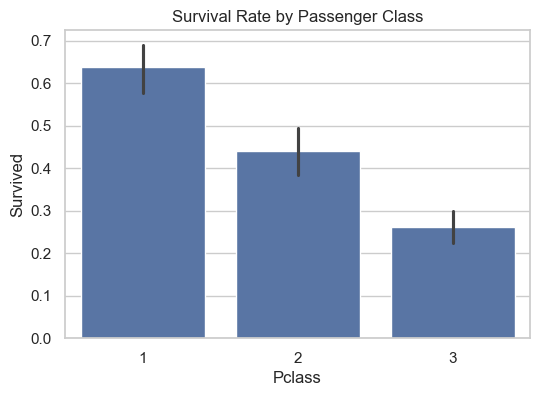

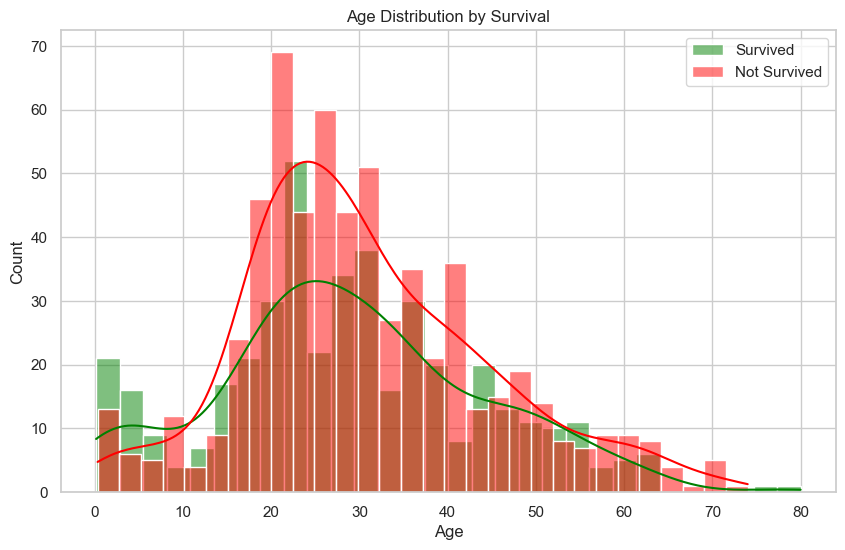

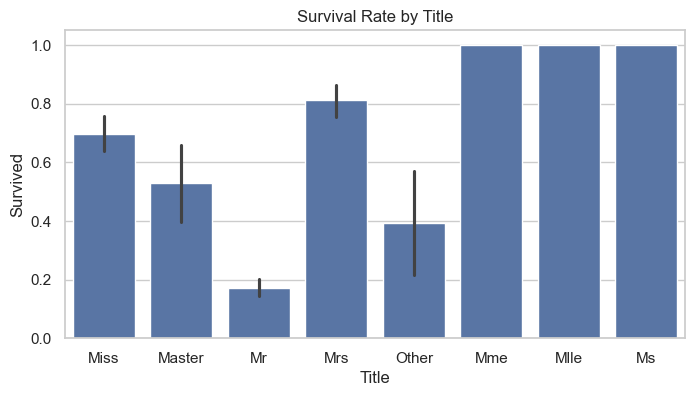


Survival rate by Sex and Pclass:
Sex     Pclass
female  1         0.962406
        2         0.893204
        3         0.473684
male    1         0.350993
        2         0.145570
        3         0.169054
Name: Survived, dtype: float64

Insights:
- Survival is encoded numerically now.
- Passenger class converted to numeric 1/2/3.
- Titles extracted from names help analyze social groups.
- Females survived more often than males.
- First-class passengers had higher survival.
- Age distribution shows younger passengers had better survival.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Load your dataset
df = pd.read_csv('task2.csv')  # update path if needed

print("First 5 rows:")
print(df.head())

# Convert 'survived' column from 'yes'/'no' to 1/0 numeric
df['Survived'] = df['survived'].map({'yes': 1, 'no': 0})

# Rename columns to match usual conventions for easier handling
df.rename(columns={'name': 'Name', 'sex': 'Sex', 'age': 'Age', 'passengerClass': 'Pclass'}, inplace=True)

# Convert Pclass from string '1st','2nd','3rd' to integer 1, 2, 3
df['Pclass'] = df['Pclass'].str.replace('st','').str.replace('nd','').str.replace('rd','').astype(int)

print("\nDataset info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Feature engineering: Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with 'Other'
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
               'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Other')

# Basic EDA plots:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts (0=No, 1=Yes)')
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df[df['Survived']==1]['Age'], kde=True, color='green', label='Survived', bins=30)
sns.histplot(df[df['Survived']==0]['Age'], kde=True, color='red', label='Not Survived', bins=30)
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.show()

print("\nSurvival rate by Sex and Pclass:")
print(df.groupby(['Sex','Pclass'])['Survived'].mean())

print("""
Insights:
- Survival is encoded numerically now.
- Passenger class converted to numeric 1/2/3.
- Titles extracted from names help analyze social groups.
- Females survived more often than males.
- First-class passengers had higher survival.
- Age distribution shows younger passengers had better survival.
""")
